In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("../Datasets/har_smartphones/train.csv")
test = pd.read_csv("../Datasets/har_smartphones/test.csv")

In [4]:
columnas = train.columns
columnas = columnas.str.replace('[()]','').str.replace('[-]','').str.replace('[,]','')

train.columns = columnas
test.columns = columnas

train.columns

<ipython-input-4-94bdf67a485c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  columnas = columnas.str.replace('[()]','').str.replace('[-]','').str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [5]:
x_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

x_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [6]:
x_train

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


### Data display

C:\Users\navar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

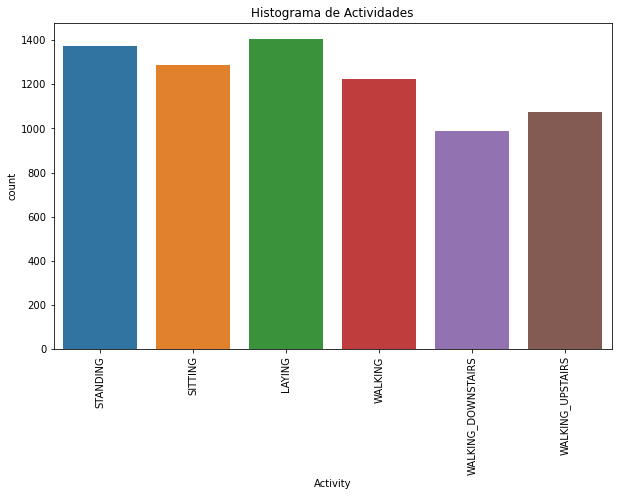

In [41]:
plt.figure(figsize=(10,6))
plt.title('Histograma de Actividades')
sns.countplot(y_train)
plt.xticks(rotation=90)

# Model comparison

In [53]:
def modelar(model, X_train, y_train, X_test, y_test, class_labels, 
                  cm_normalize=True, cm_cmap=plt.cm.Greens):
    
    results = dict()
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
  
    results['predicted'] = y_pred
   
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    print('Accuracy: ', accuracy, '\n')
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    print('Confusion Matrix: \n', cm, '\n')
        

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report, '\n')
    
    results['model'] = model
    
    return results

### Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(max_iter=500)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, 
                            cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  modelar(log_reg_grid, x_train, y_train, x_test, 
                                      y_test, class_labels=labels)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\navar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91390225        nan 0.93348893        nan 0.94042637        nan
 0.94341885        nan 0.94205863        nan 0.94178669        nan]
  warnings.warn(


Accuracy:  0.9626739056667798 

Confusion Matrix: 
 [[537   0   0   0   0   0]
 [  1 434  53   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 407  10]
 [  0   0   0  24   0 447]] 

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947
 



C:\Users\navar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Lineal Kernel SVM

In [45]:
from sklearn.svm import LinearSVC

In [58]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = modelar(lr_svc_grid, x_train, y_train, x_test, 
                                    y_test, class_labels=labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy:  0.9667458432304038 

Confusion Matrix: 
 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]] 

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947
 



C:\Users\navar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,
                                      random_state = 15)
rf_classifier_rs_results = modelar(rf_classifier_rs, x_train, y_train, 
                                         x_test, y_test, class_labels=labels)

Accuracy:  0.9185612487275195 

Confusion Matrix: 
 [[537   0   0   0   0   0]
 [  0 431  60   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 477  12   7]
 [  0   0   0  26 350  44]
 [  0   0   0  42   6 423]] 

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.95      0.83      0.89       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947
 

